# Job Satisfaction Prediction – Model Building and Evaluation

## 1. Introduction
In this notebook, we attempt to predict job satisfaction based on various factors from the Stack Overflow Developer Survey dataset. This serves as an exercise in data processing, regression modeling, and evaluation.

## 2. Data Loading and Preprocessing
We start by loading the dataset and applying necessary cleaning and preprocessing steps. The functions used here have been defined in `preprocessing.py`, which was created based on the exploratory data analysis.

In [25]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from preprocessing import map_column_to_numbers, clean_years_code, count_tools_columns
from sklearn.metrics import root_mean_squared_error

%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_info_columns", 150)
df = pd.read_csv("./stack-overflow-developer-survey-2024/survey_results_public.csv")

In [2]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    ResponseId                      65437 non-null  int64  
 1    MainBranch                      65437 non-null  object 
 2    Age                             65437 non-null  object 
 3    Employment                      65437 non-null  object 
 4    RemoteWork                      54806 non-null  object 
 5    Check                           65437 non-null  object 
 6    CodingActivities                54466 non-null  object 
 7    EdLevel                         60784 non-null  object 
 8    LearnCode                       60488 non-null  object 
 9    LearnCodeOnline                 49237 non-null  object 
 10   TechDoc                         40897 non-null  object 
 11   YearsCode                       59869 non-null  object 
 12   YearsCodePro    

In [4]:
# The following columns are removed due to insufficient data or lack of relevance to our analysis.
df = df.drop(columns=['ResponseId', 'Check', 'CodingActivities', 'Currency', 'CompTotal', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 
                      'SOPartFreq', 'SOHow', 'SOComm', 'AIToolNot interested in Using', 'AINextMuch more integrated', 
                      'AINextNo change', 'AINextMore integrated', 'AINextLess integrated', 'AINextMuch less integrated', 
                      'AIEthics', 'SurveyLength', 'SurveyEase', 'AIBen', 'LearnCodeOnline', 'AIThreat', 'AIToolInterested in Using', 
                      'AIToolNot interested in Using', 'AINextMuch more integrated', 'AINextNo change', 'AINextMore integrated', 
                      'AINextLess integrated', 'AINextMuch less integrated', 'AIEthics', 'AIChallenges', 'TBranch', 'ICorPM', 
                      'Frequency_1', 'Frequency_2', 'Frequency_3', 'ProfessionalTech', 'ProfessionalCloud', 'ProfessionalQuestion', 
                      'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal'])
# Dictionaries for preprocessing
selfdescription_dict = {'I am a developer by profession' : 5, 'I used to be a developer by profession, but no longer am': 4, 
                        'I am not primarily a developer, but I write code sometimes as part of my work/studies': 3, 
                        'I code primarily as a hobby':2, 'I am learning to code': 1, 'None of these': 0}

age_dict = {'Under 18 years old' : 0, '18-24 years old': 18, '25-34 years old': 25, '35-44 years old': 35, '45-54 years old': 45, 
            '55-64 years old': 55, '65 years or older': 65, 'Prefer not to say': np.nan }

education_dict = {'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 6, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' : 5, 
                  'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 4, 'Associate degree (A.A., A.S., etc.)': 3, 
                  'Some college/university study without earning a degree':2, 
                  'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 1, 
                  'Primary/elementary school': 0, 'Something else': 3}

orgsize_dict = {'Just me - I am a freelancer, sole proprietor, etc.': 1, '2 to 9 employees' : 2, '10 to 19 employees': 10, 
                '20 to 99 employees': 20, '100 to 499 employees': 100, '500 to 999 employees': 500, '1,000 to 4,999 employees': 1000, 
                '5,000 to 9,999 employees': 5000, '10,000 or more employees': 10000, 'I don’t know': np.nan}

infl_dict = {'I have little or no influence': 0, 'I have some influence': 1, 'I have a great deal of influence': 2}

knowledge_dict = {'Agree':1, 'Strongly agree': 2,  'Neither agree nor disagree': 0,  'Disagree': -1, 
                  'Strongly disagree': -2, np.nan: 0}

ai_dict_1 = {'Yes': 2, 'No, but I plan to soon' : 1, "No, and I don't plan to": 0, np.nan: 0}

ai_dict_2 = {'Very unfavorable': -2, 'Unfavorable' : -1, 'Indifferent': 0, 'Unsure':0, 'Favorable': 1, 'Very favorable': 2, 
             np.nan: 0}

ai_dict_3 = {'Highly distrust': -2, 'Somewhat distrust' : -1, 'Neither trust nor distrust': 0, 'Somewhat trust':1, 'Highly trust': 2}

ai_dict_4 = {'Very poor at handling complex tasks': -2, 'Bad at handling complex tasks' : -1, 
           'Neither good or bad at handling complex tasks': 0, 'Good, but not great at handling complex tasks':1, 
           'Very well at handling complex tasks': 2}

time_dict = {'Less than 15 minutes a day':0, '15-30 minutes a day': 1,  '30-60 minutes a day': 2,  '60-120 minutes a day': 3, 
             'Over 120 minutes a day': 4, np.nan: 3}

# Mapping

df['MainBranch'] = map_column_to_numbers(df, 'MainBranch', selfdescription_dict)

df['Age'] = map_column_to_numbers(df, 'Age', age_dict)

df['EdLevel'] = map_column_to_numbers(df, 'EdLevel', education_dict)

df['OrgSize'] = map_column_to_numbers(df, 'OrgSize', orgsize_dict)

df['PurchaseInfluence'] = map_column_to_numbers(df, 'PurchaseInfluence', infl_dict)

df['AISelect'] = map_column_to_numbers(df, 'AISelect', ai_dict_1)
df['AISelect'] = df['AISelect'].astype(int)

df['AISent'] = map_column_to_numbers(df, 'AISent', ai_dict_2)

df['AIAcc'] = map_column_to_numbers(df, 'AIAcc', ai_dict_3)

df['AIComplex'] = map_column_to_numbers(df, 'AIComplex', ai_dict_4)
df['AIComplex'].fillna(0, inplace=True)

df['TimeSearching'] = map_column_to_numbers(df, 'TimeSearching', time_dict)
df['TimeAnswering'] = map_column_to_numbers(df, 'TimeAnswering', time_dict)

for i in list(range(1, 10)): 
    df['Knowledge_'+str(i)] = map_column_to_numbers(df, 'Knowledge_'+str(i), knowledge_dict)

df['YearsCode'] = clean_years_code(df['YearsCode'])
df['YearsCodePro'] = clean_years_code(df['YearsCodePro'])


tools = ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 
         'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 
         'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 
         'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 
         'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 
         'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 
         'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'OfficeStackSyncAdmired', 
         'AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith', 'AISearchDevAdmired', 'AIToolCurrently Using', 'Frustration']
# (Frustration is not a tool, but we measure it the same way in this case)

count_tools_columns(df, tools)


,MainBranch,Age,Employment,RemoteWork,EdLevel,LearnCode,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,AISelect,AISent,AIAcc,AIComplex,AIToolCurrently Using,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,TimeSearching,TimeAnswering,Frustration,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
0,5,0.0,"Employed, full-time",Remote,0.0,Books / Physical media,NaN,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0,NaN,0.0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,35.0,"Employed, full-time",Remote,4.0,Books / Physical media;Colleague;On the job tr...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,7,8,7,3,1,1,3,3,3,4,5,3,0,0,0,0,0,0,6,6,6,3,3,3,2,1,0,0,0,2,1,1,0,0,0,0,0.0,NaN,0.0,0,17.0,1.0,-1.0,1.0,1.0,1.0,0.0,-1.0,1.0,1.0,3.0,3.0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,5,45.0,"Employed, full-time",Remote,5.0,Books / Physical media;Colleague;On the job tr...,API document(s) and/or SDK document(s);User gu...,37,27,Developer Experience,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,3,3,1,1,1,1,1,1,1,1,0,0,0,4,3,3,0,0,0,0,0.0,NaN,0.0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,18.0,"Student, full-time",NaN,2.0,"Other online resources (e.g., videos, blogs, f...",NaN,4,0,"Developer, full-stack",NaN,NaN,10,7,7,4,3,3,3,2,1,5,4,4,1,0,0,4,0,0,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2.0,1.0,-1.0,8,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,18.0,"Student, full-time",NaN,1.0,"Other online resources (e.g., videos, blogs, f...",API document(s) and/or SDK document(s);User gu...,9,0,"Developer, full-stack",NaN,NaN,6,5,5,2,2,2,0,0,0,0,0,0,3,2,2,0,0,0,3,2,2,1,1,1,1,0,4,3,3,2,2,2,0,0,0,0,0.0,NaN,0.0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,5,18.0,"Employed, full-time",Remote,4.0,"On the job training;School (i.e., University, ...",NaN,5,3,Blockchain,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.0,0.0,1.0,6,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,5,25.0,"Employed, full-time",Remote,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,0.0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,5,25.0,"Employed, full-time",In-person,4.0,"Other online resources (e.g., videos, blogs, f...",API document(s) and/or SDK document(s);AI-powe...,9

The query regarding employment is quite specific. We simplify the whole thing and reduce it to employed or unemployed. 

In [5]:
keywords = ['Employed, full-time', 'Employed, part-time', 'freelancer', 'Student, full-time', 'Student, part-time']
df['Employment'] = df['Employment'].apply(lambda x: any(k in x for k in keywords))

We proceed in a similar manner with other variables.

In [6]:
# Reduction to the question of whether online resources were used.
keywords = ['Online', 'online']
df['LearnCode'] = df['LearnCode'].apply(lambda x: any(k in str(x) for k in keywords))

# Reduction to the question of whether AI is involved.
df['TechDoc'] = df['TechDoc'].apply(lambda x: True if 'AI-powered' in str(x) else False)

# Get rid of other
keywords = ['Academic researcher', 'Blockchain', 'Cloud infrastructure engineer', 'Data or business analyst', 'Data engineer', 
            'Data scientist or machine learning specialist', 'Database administrator', 'Designer', 'Developer Advocate', 
            'Developer, AI', 'Developer, back-end', 'Developer, desktop or enterprise applications', 'Developer, embedded applications or devices', 
            'Developer Experience', 'Developer, front-end', 'Developer, full-stack', 
            'Developer, game or graphics', 'Developer, mobile', 'Developer, QA or test', 'DevOps specialist', 'Educator', 
            'Engineer, site reliability', 'Engineering manager', 'Hardware Engineer', 'Marketing or sales professional', 
            'Product manager', 'Project manager', 'Research & Development role', 'Scientist', 'Senior Executive (C-Suite, VP, etc.)', 
            'Student', 'System administrator', 'Security professional']
df['DevType'] = df['DevType'].apply(lambda x: x if any(k in str(x) for k in keywords) else pd.NA)

keywords=['Software Development', 'Computer Systems Design and Services', 'Internet, Telecomm or Information Services', 'Fintech', 'Energy', 'Government', 'Banking/Financial Services', 'Manufacturing', 'Transportation, or Supply Chain', 'Healthcare', 'Retail and Consumer Services', 'Higher Education', 'Media & Advertising Services', 'Insurance']
df['Industry'] = df['Industry'].apply(lambda x: x if any(k in str(x) for k in keywords) else pd.NA)


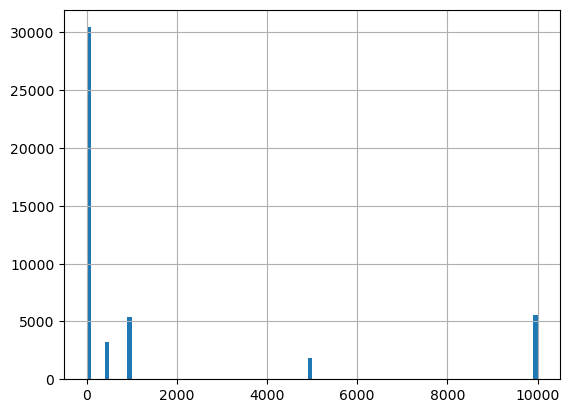

In [7]:
# The ConvertedCompYearly-distribution is right-skewed. We replace missing values by the median.
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(), inplace=True)

# The OrgSize-distribution is right-skewed. We replace missing values by the median.
df['OrgSize'].hist(bins = 100)
df['OrgSize'] = df['OrgSize'].fillna(df['OrgSize'].median())

# Missing values in influence are considered as little or no influence
df['PurchaseInfluence'] = df['PurchaseInfluence'].fillna(0)

# Missing values are taken as tools doing not well
df['AIComplex'].fillna(0, inplace=True)

In [8]:
# The JobSatPoints-columns ask for the importance of different attributes and their contribution to satisfaction
# Here we expect NaN-values to assign no contribution. 
jobs_attr = [1, 4, 5, 6, 7, 8, 9, 10, 11]
for i in jobs_attr: 
    df['JobSatPoints_'+str(i)]=df['JobSatPoints_'+str(i)].fillna(0)

Now we determine how many NaN values each column has in common with the JobSat column, in order to potentially remove columns that have too many missing values.

In [19]:

nan_not_in_A = df.isna().apply(lambda x: ((~df['JobSat'].isna()) & (x)).sum())
result = nan_not_in_A.reset_index()
result.columns = ['Column', 'NaNs_not_in_common_with_A']

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(result)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


                            Column  NaNs_not_in_common_with_A
0                       MainBranch                          0
1                              Age                         48
2                       Employment                          0
3                       RemoteWork                          9
4                          EdLevel                          0
5                        LearnCode                          0
6                          TechDoc                          0
7                        YearsCode                          0
8                     YearsCodePro                          0
9                          DevType                        944
10                         OrgSize                          0
11               PurchaseInfluence                          0
12          LanguageHaveWorkedWith                          0
13          LanguageWantToWorkWith                          0
14                 LanguageAdmired                          0
15      

In [ ]:
df = df.drop(['AIAcc'], axis=1)

Finally, we will convert the categorical variables into dummy variables and remove the remaining NaN values.

In [10]:

df_dum_1 = pd.get_dummies(df[['RemoteWork', 'DevType', 'Industry']], dummy_na=True)
df_dum_2 = df.drop(['RemoteWork', 'DevType', 'Industry'], axis=1)
df_dum = pd.concat([df_dum_1, df_dum_2], axis=1)

df_cleaned = df_dum.dropna()
df_cleaned.info()

In [12]:
df_cleaned.head()


,"RemoteWork_Hybrid (some remote, some in-person)",RemoteWork_In-person,RemoteWork_Remote,RemoteWork_nan,DevType_Academic researcher,DevType_Blockchain,DevType_Cloud infrastructure engineer,DevType_Data engineer,DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_DevOps specialist,DevType_Developer Advocate,DevType_Developer Experience,"DevType_Developer, AI","DevType_Developer, QA or test","DevType_Developer, back-end","DevType_Developer, desktop or enterprise applications","DevType_Developer, embedded applications or devices","DevType_Developer, front-end","DevType_Developer, full-stack","DevType_Developer, game or graphics","DevType_Developer, mobile",DevType_Educator,"DevType_Engineer, site reliability",DevType_Engineering manager,DevType_Hardware Engineer,DevType_Marketing or sales professional,DevType_Product manager,DevType_Project manager,DevType_Research & Development role,DevType_Scientist,DevType_Security professional,"DevType_Senior Executive (C-Suite, VP, etc.)",DevType_Student,DevType_System administrator,DevType_nan,Industry_Banking/Financial Services,Industry_Computer Systems Design and Services,Industry_Energy,Industry_Fintech,Industry_Government,Industry_Healthcare,Industry_Higher Education,Industry_Insurance,"Industry_Internet, Telecomm or Information Services",Industry_Manufacturing,Industry_Media & Advertising Services,Industry_Retail and Consumer Services,Industry_Software Development,"Industry_Transportation, or Supply Chain",Industry_nan,MainBranch,Age,Employment,EdLevel,LearnCode,TechDoc,YearsCode,YearsCodePro,OrgSize,PurchaseInfluence,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,AISelect,AISent,AIComplex,AIToolCurrently Using,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,TimeSearching,TimeAnswering,Frustration,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
10,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,4,35.0,True,4.0,True,False,20,0,100.0,0.0,3,6,3,4,4,4,2,1,1,3,4,3,0,0,0,0,0,0,3,3,3,1,1,1,2,1,4,3,3,5,5,5,5,3,3,2,1.0,0.0,5,15.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,3.0,4,50.0,0.0,0.0,25.0,10.0,0.0,15.0,0.0,0.0,65000.0,8.0
12,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,5,35.0,True,4.0,False,False,20,12,100.0,0.0,5,3,3,1,1,1,4,2,2,0,0,0,0,0,0,0,0,0,8,3,3,3,4,3,2,1,3,1,1,4,2,2,0,0,0,0,0.0,0.0,0,12.0,2.0,-1.0,0.0,1.0,1.0,-2.0,1.0,1.0,-2.0,2.0,1.0,2,0.0,0.0,30.0,30.0,0.0,0.0,20.0,10.0,10.0,65000.0,8.0
15,True,False,False,False,False,False,False,False,False,False

In [21]:
correlation = pd.DataFrame({'Column': df_cleaned.columns.tolist(), 'Correlation': df_cleaned.corr()['JobSat'].tolist()})
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(correlation)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


                                                Column  Correlation
0      RemoteWork_Hybrid (some remote, some in-person)     0.002268
1                                 RemoteWork_In-person    -0.067380
2                                    RemoteWork_Remote     0.051119
3                                       RemoteWork_nan     0.008470
4                          DevType_Academic researcher    -0.003996
5                                   DevType_Blockchain     0.015784
6                DevType_Cloud infrastructure engineer     0.000576
7                                DevType_Data engineer    -0.012328
8                     DevType_Data or business analyst    -0.029377
9    DevType_Data scientist or machine learning spe...    -0.005121
10                      DevType_Database administrator    -0.015419
11                                    DevType_Designer    -0.007386
12                           DevType_DevOps specialist    -0.001186
13                          DevType_Developer Ad

## 3. Model Building and Evaluation
In this section, we build two regression models to predict job satisfaction and evaluate the performance of the models using appropriate metrics and compare the results to random predictions to assess the model's predictive power.

In [15]:
X = df_cleaned.drop("JobSat", axis=1)
y = df_cleaned["JobSat"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred_train_lr = linear_model.predict(X_train)
y_pred_test_lr = linear_model.predict(X_test)
print(y_pred_test_lr[:20].round(2))

[7.72 7.06 6.82 8.32 6.97 7.74 7.4  8.04 8.15 6.28 6.87 4.81 6.44 7.81
 6.72 7.19 6.05 6.52 6.18 8.24]


In [23]:
print(y_test[:20].values)

[8. 6. 8. 8. 8. 7. 9. 8. 8. 7. 5. 6. 8. 9. 5. 9. 5. 8. 8. 7.]


In [24]:
relative_errors = np.abs(y_pred_test_lr - y_test) / y_test * 100
print("Relative errors in per cent: ", relative_errors[:20].values)

Relative errors in per cent:  [ 3.52844764 17.63740107 14.75542961  3.98876881 12.84057386 10.57326528
 17.75440069  0.48347302  1.93739133 10.25362004 37.3739779  19.86368112
 19.52396585 13.27134214 34.42450926 20.13443634 21.08738288 18.54084386
 22.71547662 17.68390121]


In [26]:
rmse_train_lr = root_mean_squared_error(y_train, y_pred_train_lr)
print(rmse_train_lr)
rmse_test_lr = root_mean_squared_error(y_test, y_pred_test_lr)
print(rmse_test_lr)

1.8460578456485264
1.849537189330838


In [28]:
df['JobSat'].describe()

count    29126.000000
mean         6.935041
std          2.088259
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: JobSat, dtype: float64

In [31]:
print(y_pred_train_lr.mean())

6.931438184851006


It can be seen that the mean of the predictions and the mean of JobSat in the training set match well. At the same time, the standard deviation of JobSat in the training set and the RMSE of the model are also very close.

### Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=7, random_state=13)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, random_state=13)

In [34]:
# make predictions
y_pred_train_rfr = model.predict(X_train)
y_pred_test_rfr = model.predict(X_test)

In [36]:
# calculate RMSE
rmse_train_rfr = root_mean_squared_error(y_train, y_pred_train_rfr)
print(rmse_train_rfr)
rmse_test_rfr = root_mean_squared_error(y_test, y_pred_test_rfr)
print(rmse_test_rfr)

1.792215962815781
1.8797971454774538


In [38]:
print(y_pred_test_rfr[:10])
print(y_test[:10])

[7.45187754 7.00489185 6.6501515  7.15842115 7.28054297 7.89663902
 7.7642541  7.55895357 7.72657231 6.35833672]
58463    8.0
25047    6.0
5186     8.0
50873    8.0
34566    8.0
44398    7.0
60649    9.0
16379    8.0
57726    8.0
17787    7.0
Name: JobSat, dtype: float64


In [40]:
print(y_pred_train_lr.mean())
print(rmse_train_rfr)

6.931438184851006
1.792215962815781


In [41]:
df['JobSat'].describe()

count    29126.000000
mean         6.935041
std          2.088259
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: JobSat, dtype: float64

The same can be observed here. The model arrives at similar mean values, and the RMSE is only slightly lower than the standard deviation in the dataset.

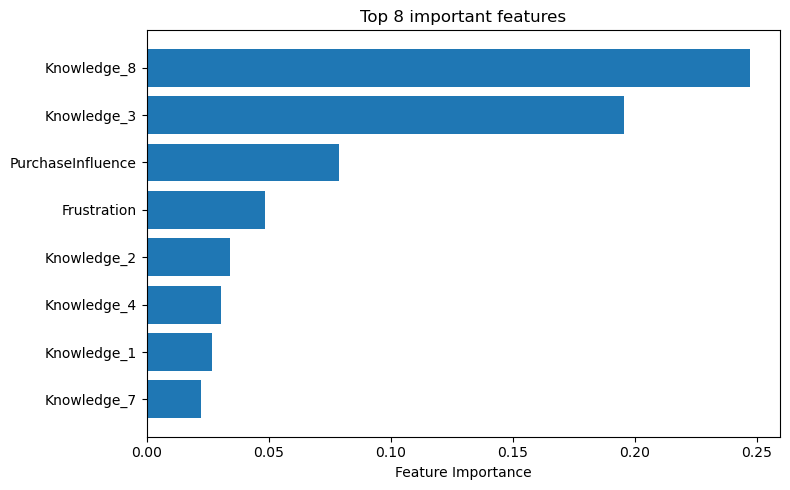

In [42]:
importances = model.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]  
top_n = 8
top_features = feature_names[indices][:top_n]
top_importances = importances[indices][:top_n]


plt.figure(figsize=(8, 5))
plt.barh(top_features[::-1], top_importances[::-1])  
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} important features')
plt.tight_layout()
plt.show()


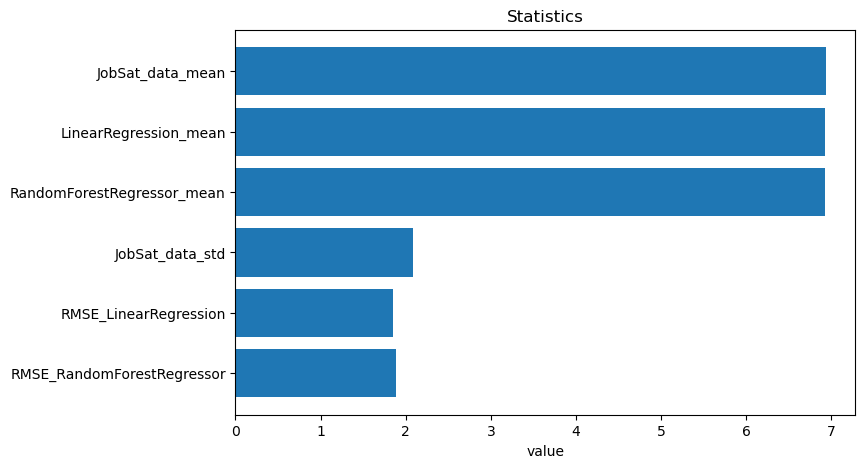

In [43]:
importances = [df['JobSat'].mean(), y_pred_test_lr.mean(), y_pred_test_rfr.mean(), df['JobSat'].std(), rmse_test_lr, rmse_test_rfr]
feature_names = ['JobSat_data_mean', 'LinearRegression_mean', 'RandomForestRegressor_mean', 'JobSat_data_std', 'RMSE_LinearRegression', 'RMSE_RandomForestRegressor']

importances.reverse()
feature_names.reverse()

# Plot
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.xlabel('value')
plt.title('Statistics')
plt.show()

## 5. Discussion and Conclusion
The evaluation shows that the model performs **only marginally better than random guesses**. This is in line with the findings from the exploratory data analysis, which revealed **no significant correlations** between job satisfaction and other features. The project illustrates the challenges of real-world data and the importance of meaningful features when building predictive models.
